# CSCI 6920 - Homework 2
Name: Ohad Nir;
Due: 9/23/2022

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
import time

warnings.filterwarnings("ignore")
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
def plot_confusion_matrix(y, y_hat, title):
    cm = confusion_matrix(y, y_hat)
    sns.heatmap(cm, 
                xticklabels=["Not Bankrupted", "Bankrupted"], 
                yticklabels=["Not Bankrupted", "Bankrupted"], 
                annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

def precision_recall_f1(y, y_hat):
    cm = confusion_matrix(y, y_hat)
    
    precision = cm[1,1] / (cm[1,1] + cm[0,1])
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    f1_score = 2 * (precision * recall) / (precision+recall)
    
    return [f1_score, precision, recall]

def traintime(model, X, y, N): # get large sample to adjust for CPU context swtiching.
    rain_t = []
    for i in range(N):
        tic = time.time()
        model.fit(X, y)
        toc = time.time()

        rain_t.append(toc-tic)
    return float(np.mean(rain_t))

In [3]:
results_df = pd.DataFrame(columns=["Model Name", "Train Time", "Accuracy", "F1-Score", "Precision", "Recall"])

### Data Preprocessing
Process was outlined in homework 1.

In [4]:
seed = 10
data_path = "..\\data\\bankruptcy.csv"
bankruptcy_df = pd.read_csv(data_path)

In [5]:
bankruptcy_df = bankruptcy_df.loc[:, bankruptcy_df.columns != ' Net Income Flag'] # remove uninformative features.
feature_corr = bankruptcy_df.corr().abs()["Bankrupt?"] # corrolation of of features based on the target.
bankruptcy_df = bankruptcy_df.loc[:, feature_corr >= 0.2] # take the most correlated features.

In [6]:
X = bankruptcy_df.loc[:, bankruptcy_df.columns != 'Bankrupt?'].to_numpy()
y = bankruptcy_df["Bankrupt?"].to_numpy()

In [7]:
pos_df = bankruptcy_df[bankruptcy_df['Bankrupt?'] == 1].sample(frac=1, random_state=seed) # extract all the bankrupt rows and scramble.
pos_train_df = pos_df.iloc[:180,:] # approximately 80% of the bankrupt companies for the training set. 
pos_test_df = pos_df.iloc[180:,:] # approximately 20% of the bankrupt companies for the testing set. 

neg_df = bankruptcy_df[bankruptcy_df['Bankrupt?'] == 0].sample(frac=1, random_state=seed) # extract all the non-bankrupt rows and scramble.
neg_train_df = neg_df.iloc[:250,:] # 250 of the non-bankrupt companies for the training set. 
neg_test_df = neg_df.iloc[250:,:] # Rest of the non-bankrupt companies for the testing set.

train_df = pd.concat([pos_train_df, neg_train_df], axis=0)
test_df = pd.concat([pos_test_df, neg_test_df], axis=0)

X_train = train_df.loc[:, train_df.columns != 'Bankrupt?'].to_numpy()
y_train = train_df["Bankrupt?"].to_numpy()

X_test = test_df.loc[:, test_df.columns != 'Bankrupt?'].to_numpy()
y_test = test_df["Bankrupt?"].to_numpy()

## Task 1
Implement a Decision Tree Classifier for your classification problem. You may use a built-in package to implement your classifier. Try modifying one or more of the input parameters and describe what changes you notice in your results. Clearly describe how these factors are affecting your output.

### Modifing the Criterion:

#### Gini Criterion:

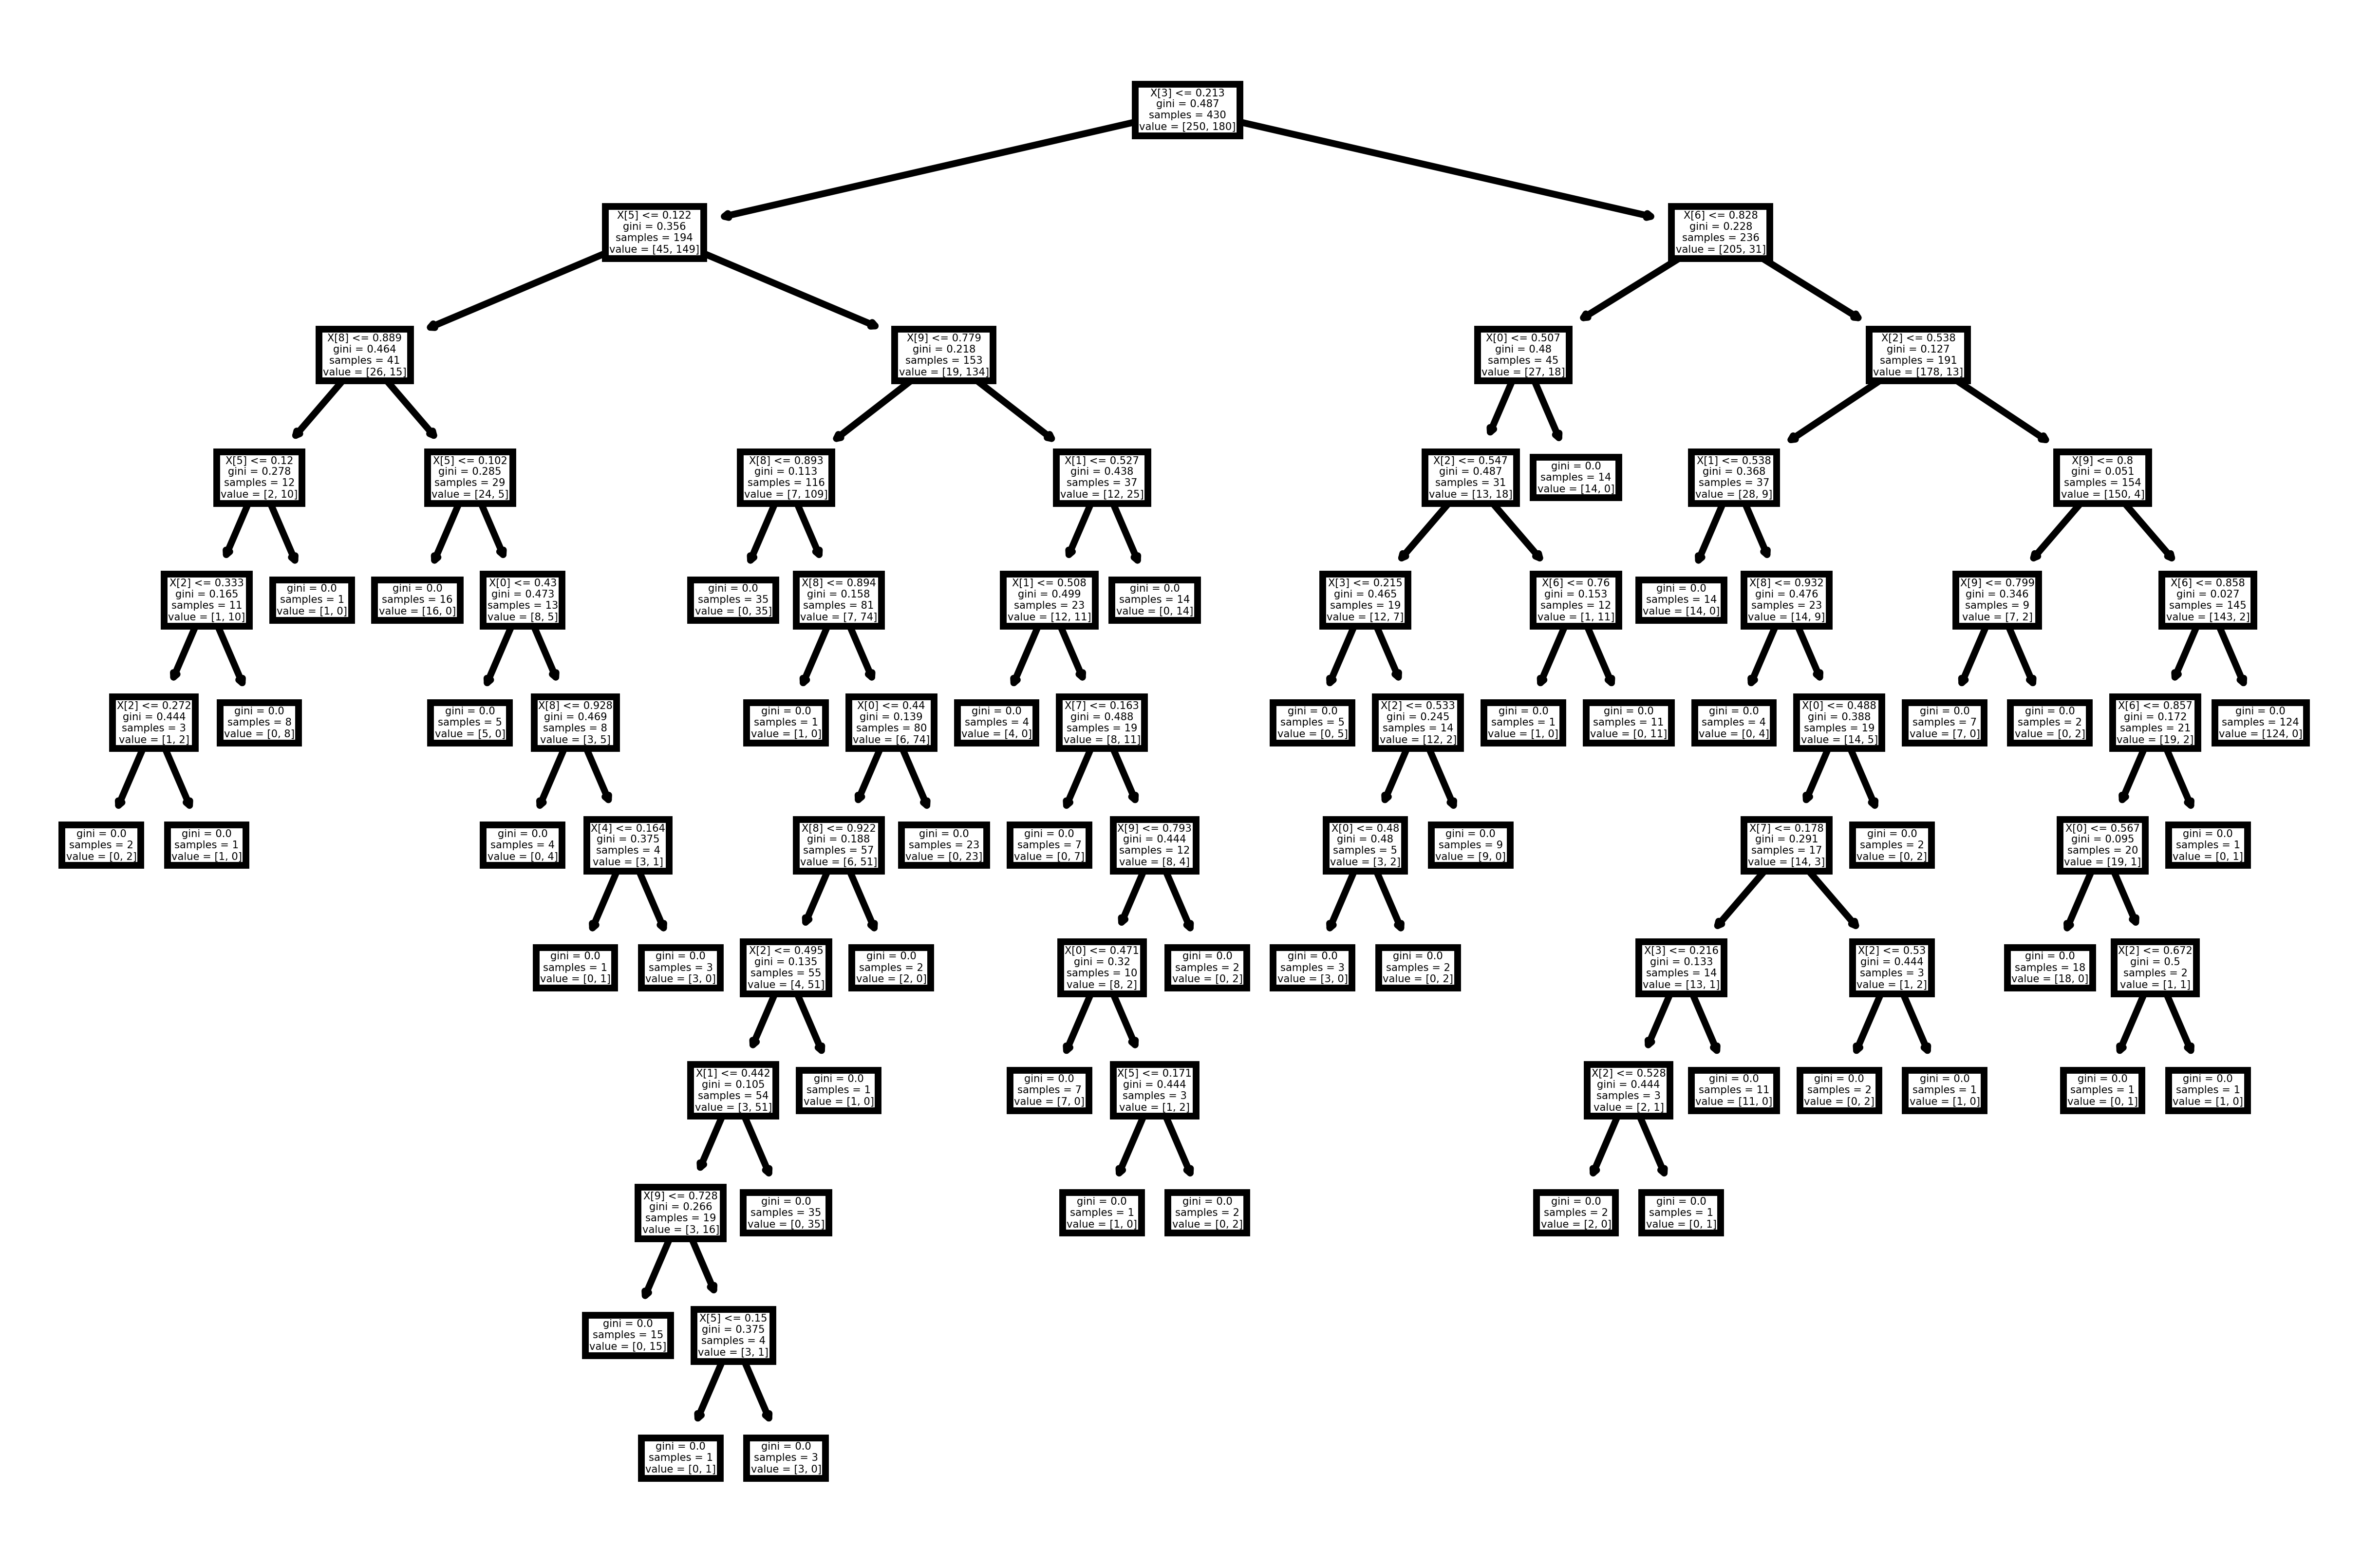

Decision tree classifier with gini criterion:
	Train accurcy is 1.00 and test accurcy is 0.83.
	Train f1-score is 1.0000 and test f1-score is 0.0531.
	Train precision is 1.00 and test precision is 0.03.
	Train recall is 1.00 and test recall is 0.75.


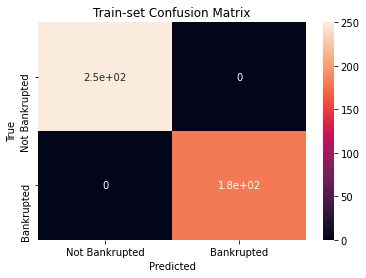

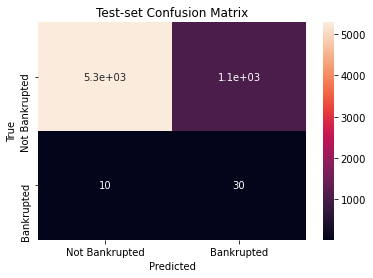

In [8]:
gini_tree_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, random_state=seed)
gini_tree_clf.fit(X_train, y_train)

plt.figure(dpi=1000)
plot_tree(gini_tree_clf)
plt.show()
plt.clf()

y_train_hat = gini_tree_clf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_hat)
pre_rec_f1_train = precision_recall_f1(y_train, y_train_hat)

y_test_hat = gini_tree_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_hat)
pre_rec_f1_test = precision_recall_f1(y_test, y_test_hat)

print("Decision tree classifier with gini criterion:")
print(f"\tTrain accurcy is {train_acc:.2f} and test accurcy is {test_acc:.2f}.")
print(f"\tTrain f1-score is {pre_rec_f1_train[0]:.4f} and test f1-score is {pre_rec_f1_test[0]:.4f}.")
print(f"\tTrain precision is {pre_rec_f1_train[1]:.2f} and test precision is {pre_rec_f1_test[1]:.2f}.")
print(f"\tTrain recall is {pre_rec_f1_train[2]:.2f} and test recall is {pre_rec_f1_test[2]:.2f}.")
plot_confusion_matrix(y_train, y_train_hat, title="Train-set Confusion Matrix")
plot_confusion_matrix(y_test, y_test_hat, title="Test-set Confusion Matrix")

#### Entropy Criterion:

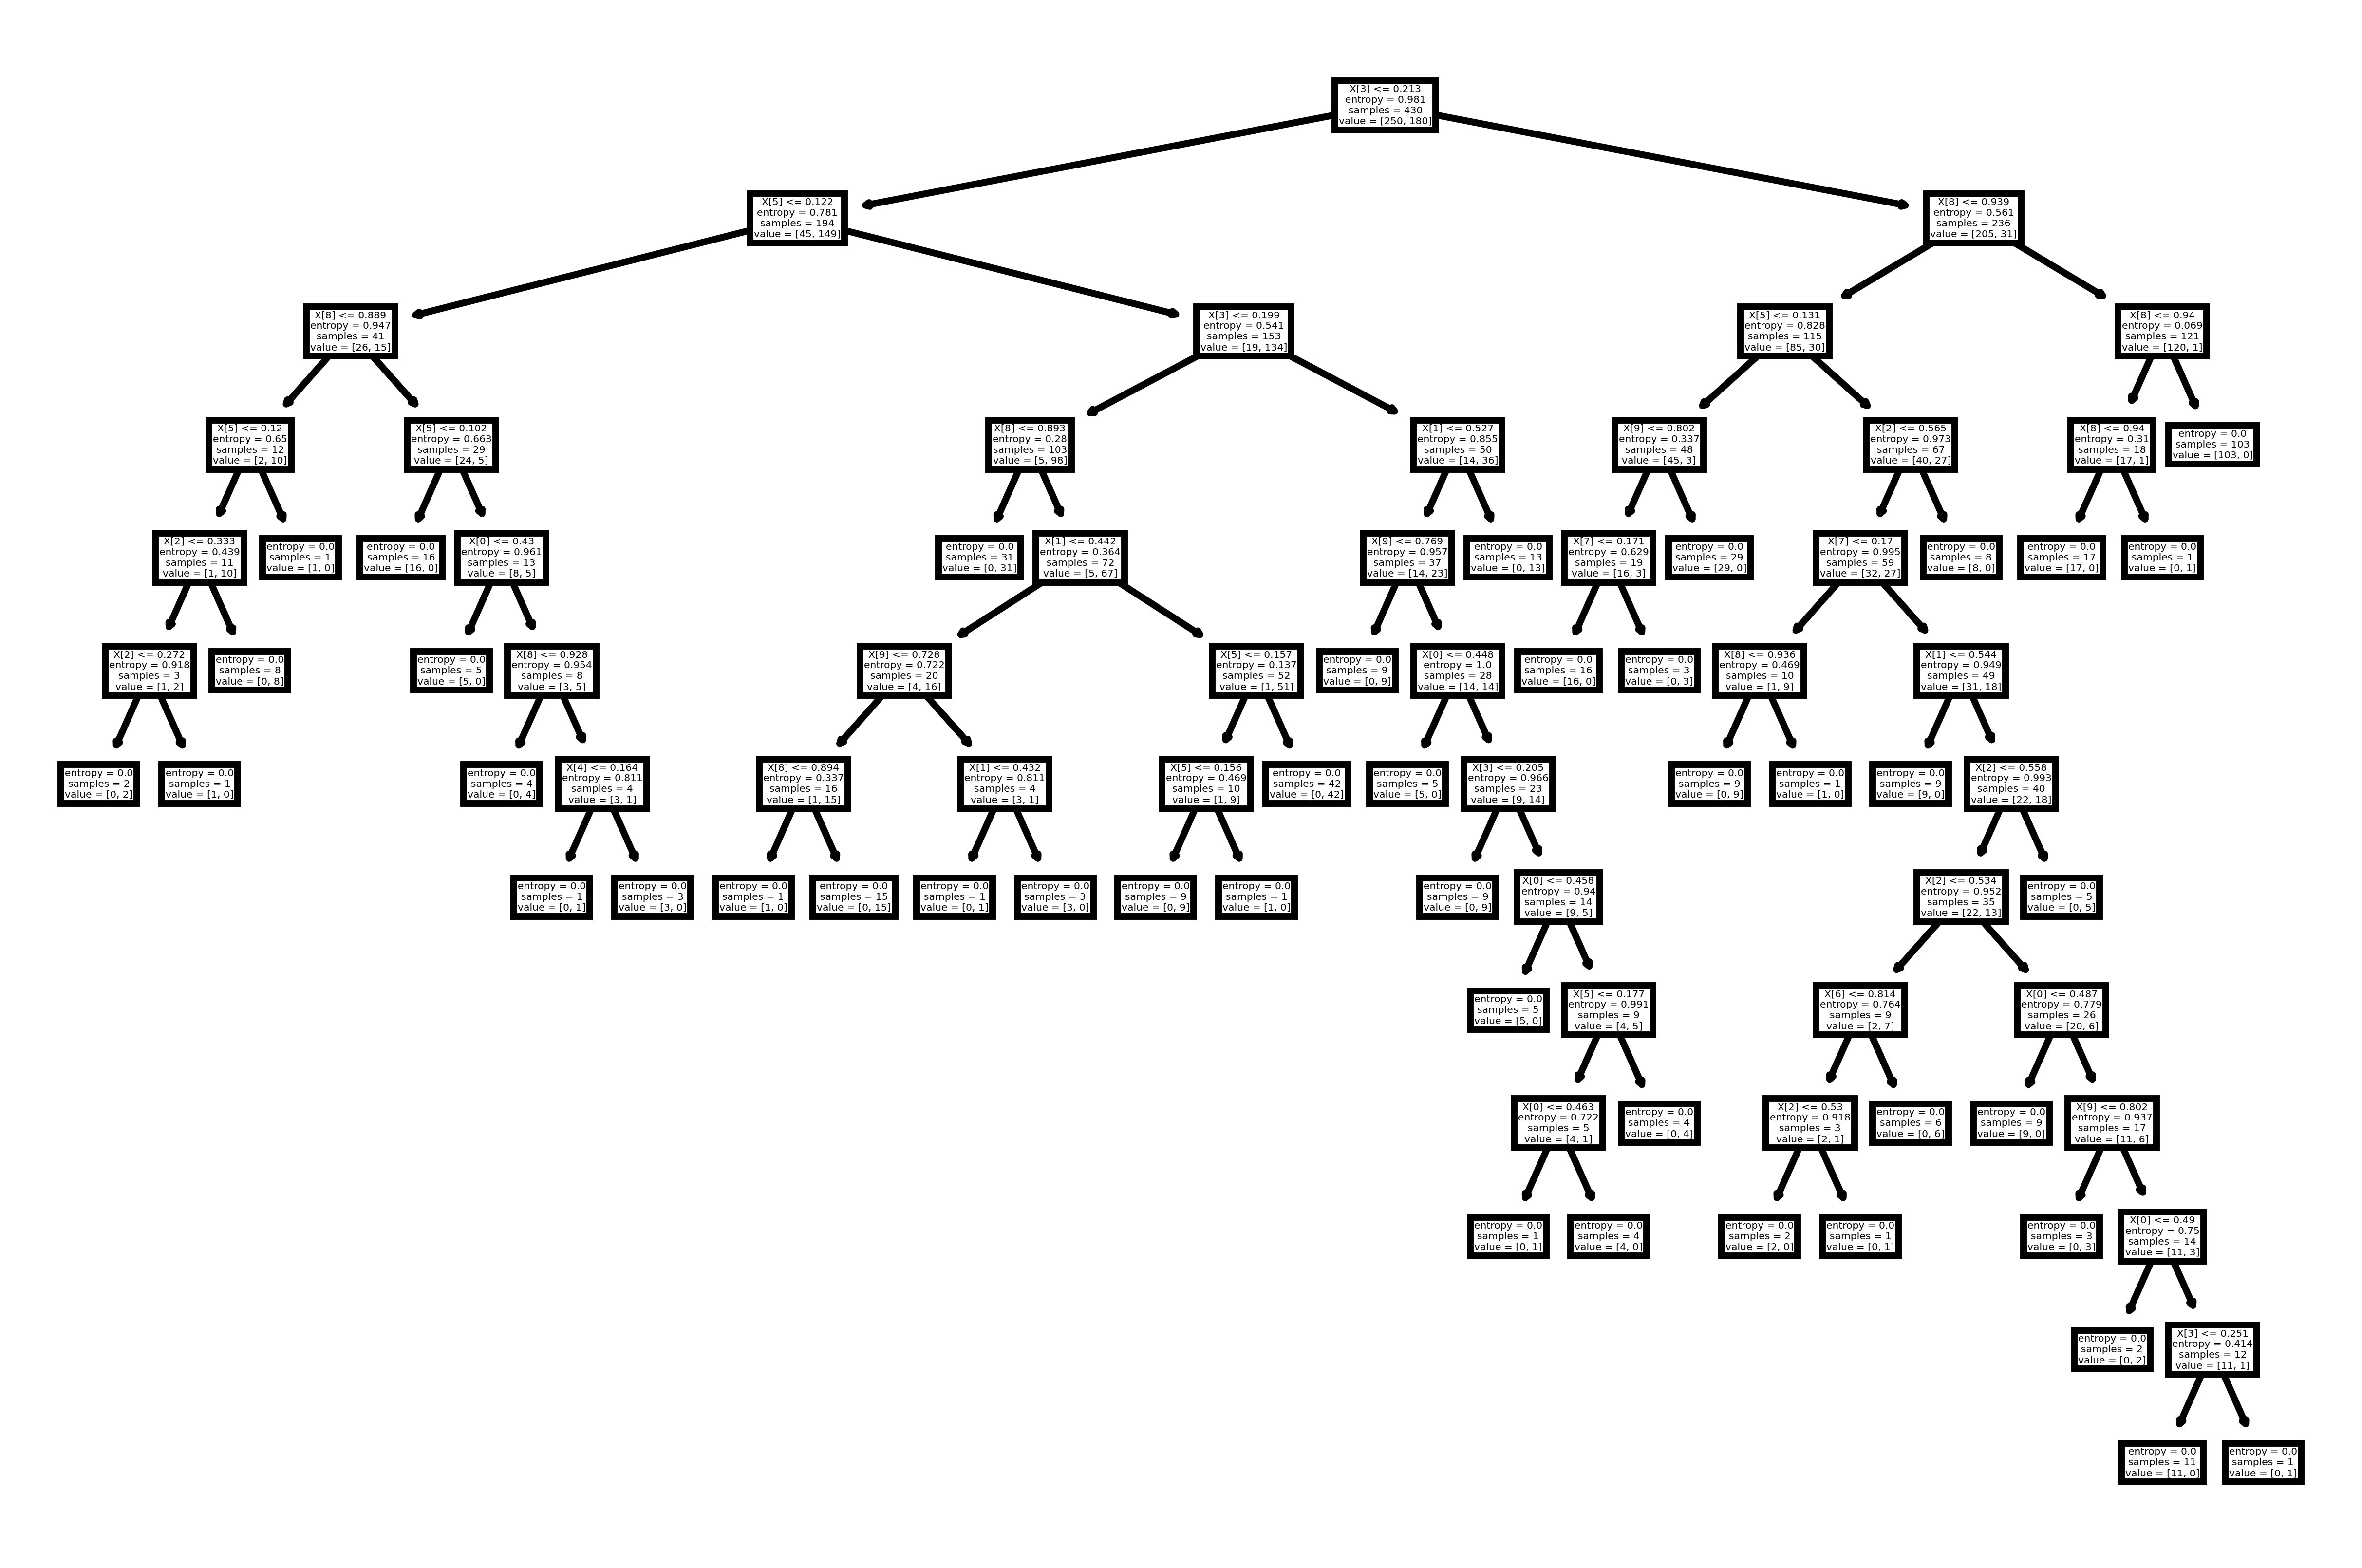

Decision tree classifier with entropy criterion:
	Train accurcy is 1.00 and test accurcy is 0.82.
	Train f1-score is 1.0000 and test f1-score is 0.7000.
	Train precision is 1.00 and test precision is 0.05.
	Train recall is 1.00 and test recall is 0.02.


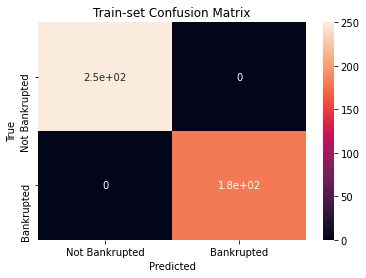

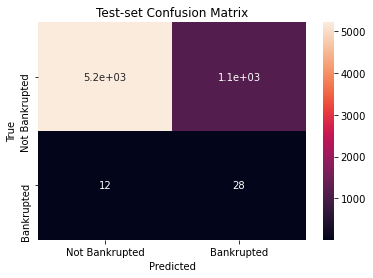

In [9]:
entropy_tree_clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, random_state=seed)
entropy_tree_clf.fit(X_train, y_train)

plt.figure(dpi=1000)
plot_tree(entropy_tree_clf)
plt.show()
plt.clf()

y_train_hat = entropy_tree_clf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_hat)
pre_rec_f1_train = precision_recall_f1(y_train, y_train_hat)

y_test_hat = entropy_tree_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_hat)
pre_rec_f1_test = precision_recall_f1(y_test, y_test_hat)

print("Decision tree classifier with entropy criterion:")
print(f"\tTrain accurcy is {train_acc:.2f} and test accurcy is {test_acc:.2f}.")
print(f"\tTrain f1-score is {pre_rec_f1_train[2]:.4f} and test f1-score is {pre_rec_f1_test[2]:.4f}.")
print(f"\tTrain precision is {pre_rec_f1_train[0]:.2f} and test precision is {pre_rec_f1_test[0]:.2f}.")
print(f"\tTrain recall is {pre_rec_f1_train[1]:.2f} and test recall is {pre_rec_f1_test[1]:.2f}.")
plot_confusion_matrix(y_train, y_train_hat, title="Train-set Confusion Matrix")
plot_confusion_matrix(y_test, y_test_hat, title="Test-set Confusion Matrix")

#### Conclusion:
Above I modified the decision trees criterion to split a node. I tried two criteria, Gini and entropy. Gini picks the split with the highest class imbalance (i.e., creates the most "pure" partition). On the other hand, entropy splits based on which split will result in the most information gain (i.e., creates the most homogeneous state). So the two conditions effectively try to archive the same result but use different measures. So we would expect the results to be similar. We see that both models achieved a training accuracy and f1-score of 1. Entropy achieved slightly better accuracy and f1-score than Gini, but it's not a meaningful difference. This tells us that for this dataset modifying the criteria leads to little change.

### Modifing the Maximum Depth:

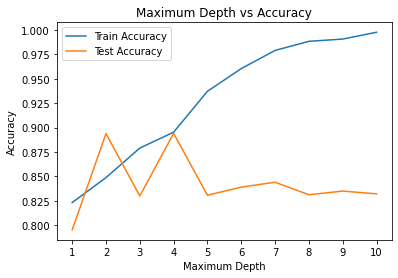

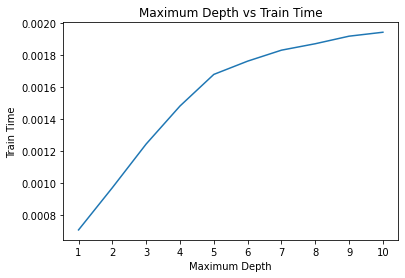

In [10]:
max_depth = 10
train_accs, test_accs = [], []
traintimes = [] 

for i in range(1, max_depth+1):
    mdepth_tree_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i, random_state=seed)
    
    t = traintime(mdepth_tree_clf, X_train, y_train, 1000)
    traintimes.append(t)
    
    train_acc = accuracy_score(y_train, mdepth_tree_clf.predict(X_train))
    test_acc = accuracy_score(y_test, mdepth_tree_clf.predict(X_test))

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    
plt.plot(range(1, max_depth+1), train_accs, label="Train Accuracy")
plt.plot(range(1, max_depth+1), test_accs, label="Test Accuracy")
plt.title("Maximum Depth vs Accuracy")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.locator_params(axis='x', nbins=max_depth)
plt.show()

plt.plot(range(1, max_depth+1), traintimes)
plt.title("Maximum Depth vs Train Time")
plt.xlabel("Maximum Depth")
plt.ylabel("Train Time")
plt.locator_params(axis='x', nbins=max_depth)
plt.show()

#### Conclusion:
Above I modified the decision tress maximum depth parameter. This parameter tells the decision tree what deepest the tree can go. From the results, we see that as the depth increases, the model fits the training data better and starts to overfit at a certain point. This is expected since the deeper the tree, the more degrees of freedom it has. We also see that as the depth of the tree increases, the training time increases logarithmically. This is likely a product of the model being able to fit the data better us it doesn't need to go to the maximum depth to increase the accuracy.

## Task 2
From the Bagging and Boosting ensemble methods pick any one algorithm from each category. Implement both the algorithms using the same data. Use k-fold cross validation to find the effectiveness of both the models. Comment on the difference/similarity of the results.

### K-fold

In [9]:
k=10

#### Bagging Method - Random Forst

Random forest classifier:
	Took 0.6655 seconds to train.
	Average accurcy is 0.9688 with standard deviation of 0.0037 with 10-fold cross validation.
	F1-score is 0.1045.
	Precision is 0.19.
	Recall is 0.85.


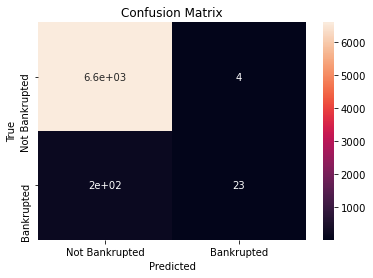

In [12]:
random_forest_clf = RandomForestClassifier(criterion="gini", max_depth=3, n_estimators=150, random_state=seed)
k_results = cross_val_score(random_forest_clf, X, y, cv=k)

t = traintime(random_forest_clf, X, y, 25)
random_forest_clf.fit(X, y)

y_hat = random_forest_clf.predict(X)
pre_rec_f1 = precision_recall_f1(y, y_hat)

print("Random forest classifier:")
print(f"\tTook {t:.4f} seconds to train.")
print(f"\tAverage accurcy is {np.mean(k_results):.4f} with standard deviation of {np.std(k_results):.4f} with {k}-fold cross validation.")
print(f"\tF1-score is {pre_rec_f1[2]:.4f}.")
print(f"\tPrecision is {pre_rec_f1[0]:.2f}.")
print(f"\tRecall is {pre_rec_f1[1]:.2f}.")
plot_confusion_matrix(y, y_hat, title="Confusion Matrix")

results_df.loc[1] = ["Random Forest - Gini", t, np.mean(k_results)] + pre_rec_f1

#### Boosting Method - XGBoost

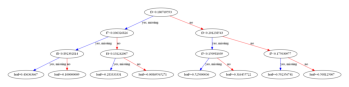

XGBoost classifier:
	Took 0.5208 seconds to train.
	Average accurcy is 0.9679 with standard deviation of 0.0057 with 10-fold cross validation.
	F1-score is 0.7636.
	Precision is 0.86.
	Recall is 0.99.


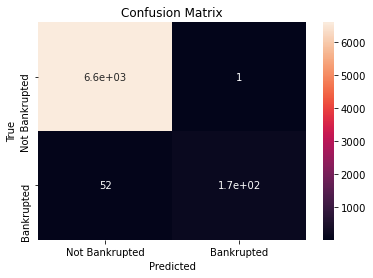

In [13]:
xgboost_clf = xgb.XGBClassifier(n_estimators=150, max_depth=3, booster="gbtree", random_state=seed)
k_results = cross_val_score(xgboost_clf, X, y, cv=k)

t = traintime(xgboost_clf, X, y, 25)
xgboost_clf.fit(X, y)

xgb.plot_tree(xgboost_clf)
plt.show()
plt.clf()

y_hat = xgboost_clf.predict(X)
pre_rec_f1 = precision_recall_f1(y, y_hat)

print("XGBoost classifier:")
print(f"\tTook {t:.4f} seconds to train.")
print(f"\tAverage accurcy is {np.mean(k_results):.4f} with standard deviation of {np.std(k_results):.4f} with {k}-fold cross validation.")
print(f"\tF1-score is {pre_rec_f1[2]:.4f}.")
print(f"\tPrecision is {pre_rec_f1[0]:.2f}.")
print(f"\tRecall is {pre_rec_f1[1]:.2f}.")
plot_confusion_matrix(y, y_hat, title="Confusion Matrix")

results_df.loc[2] = ["XGBoost - gbtree", t, np.mean(k_results)] + pre_rec_f1

#### Conclution
Both random forest and XGBoost achieved similar k-fold cross-validation accuracy - 0.9688 and 0.9679, respectively. However, we see that XGBoost was much more resilient to class imbalance. It attained an f1-score of 0.8639 compared to the 0.1862 f1-score of the random forest model. XGboost was also faster to train.

## Task 3
Compare the effectiveness of the three models implemented above. Clearly
describe the metric you are using for comparison. Describe (with examples) Why is this
metric(metrics) suited/appropriate for the problem at hand? How would a choice of a different
metric impact your results? Can you demonstrate that?

#### Decision Tree Metrics

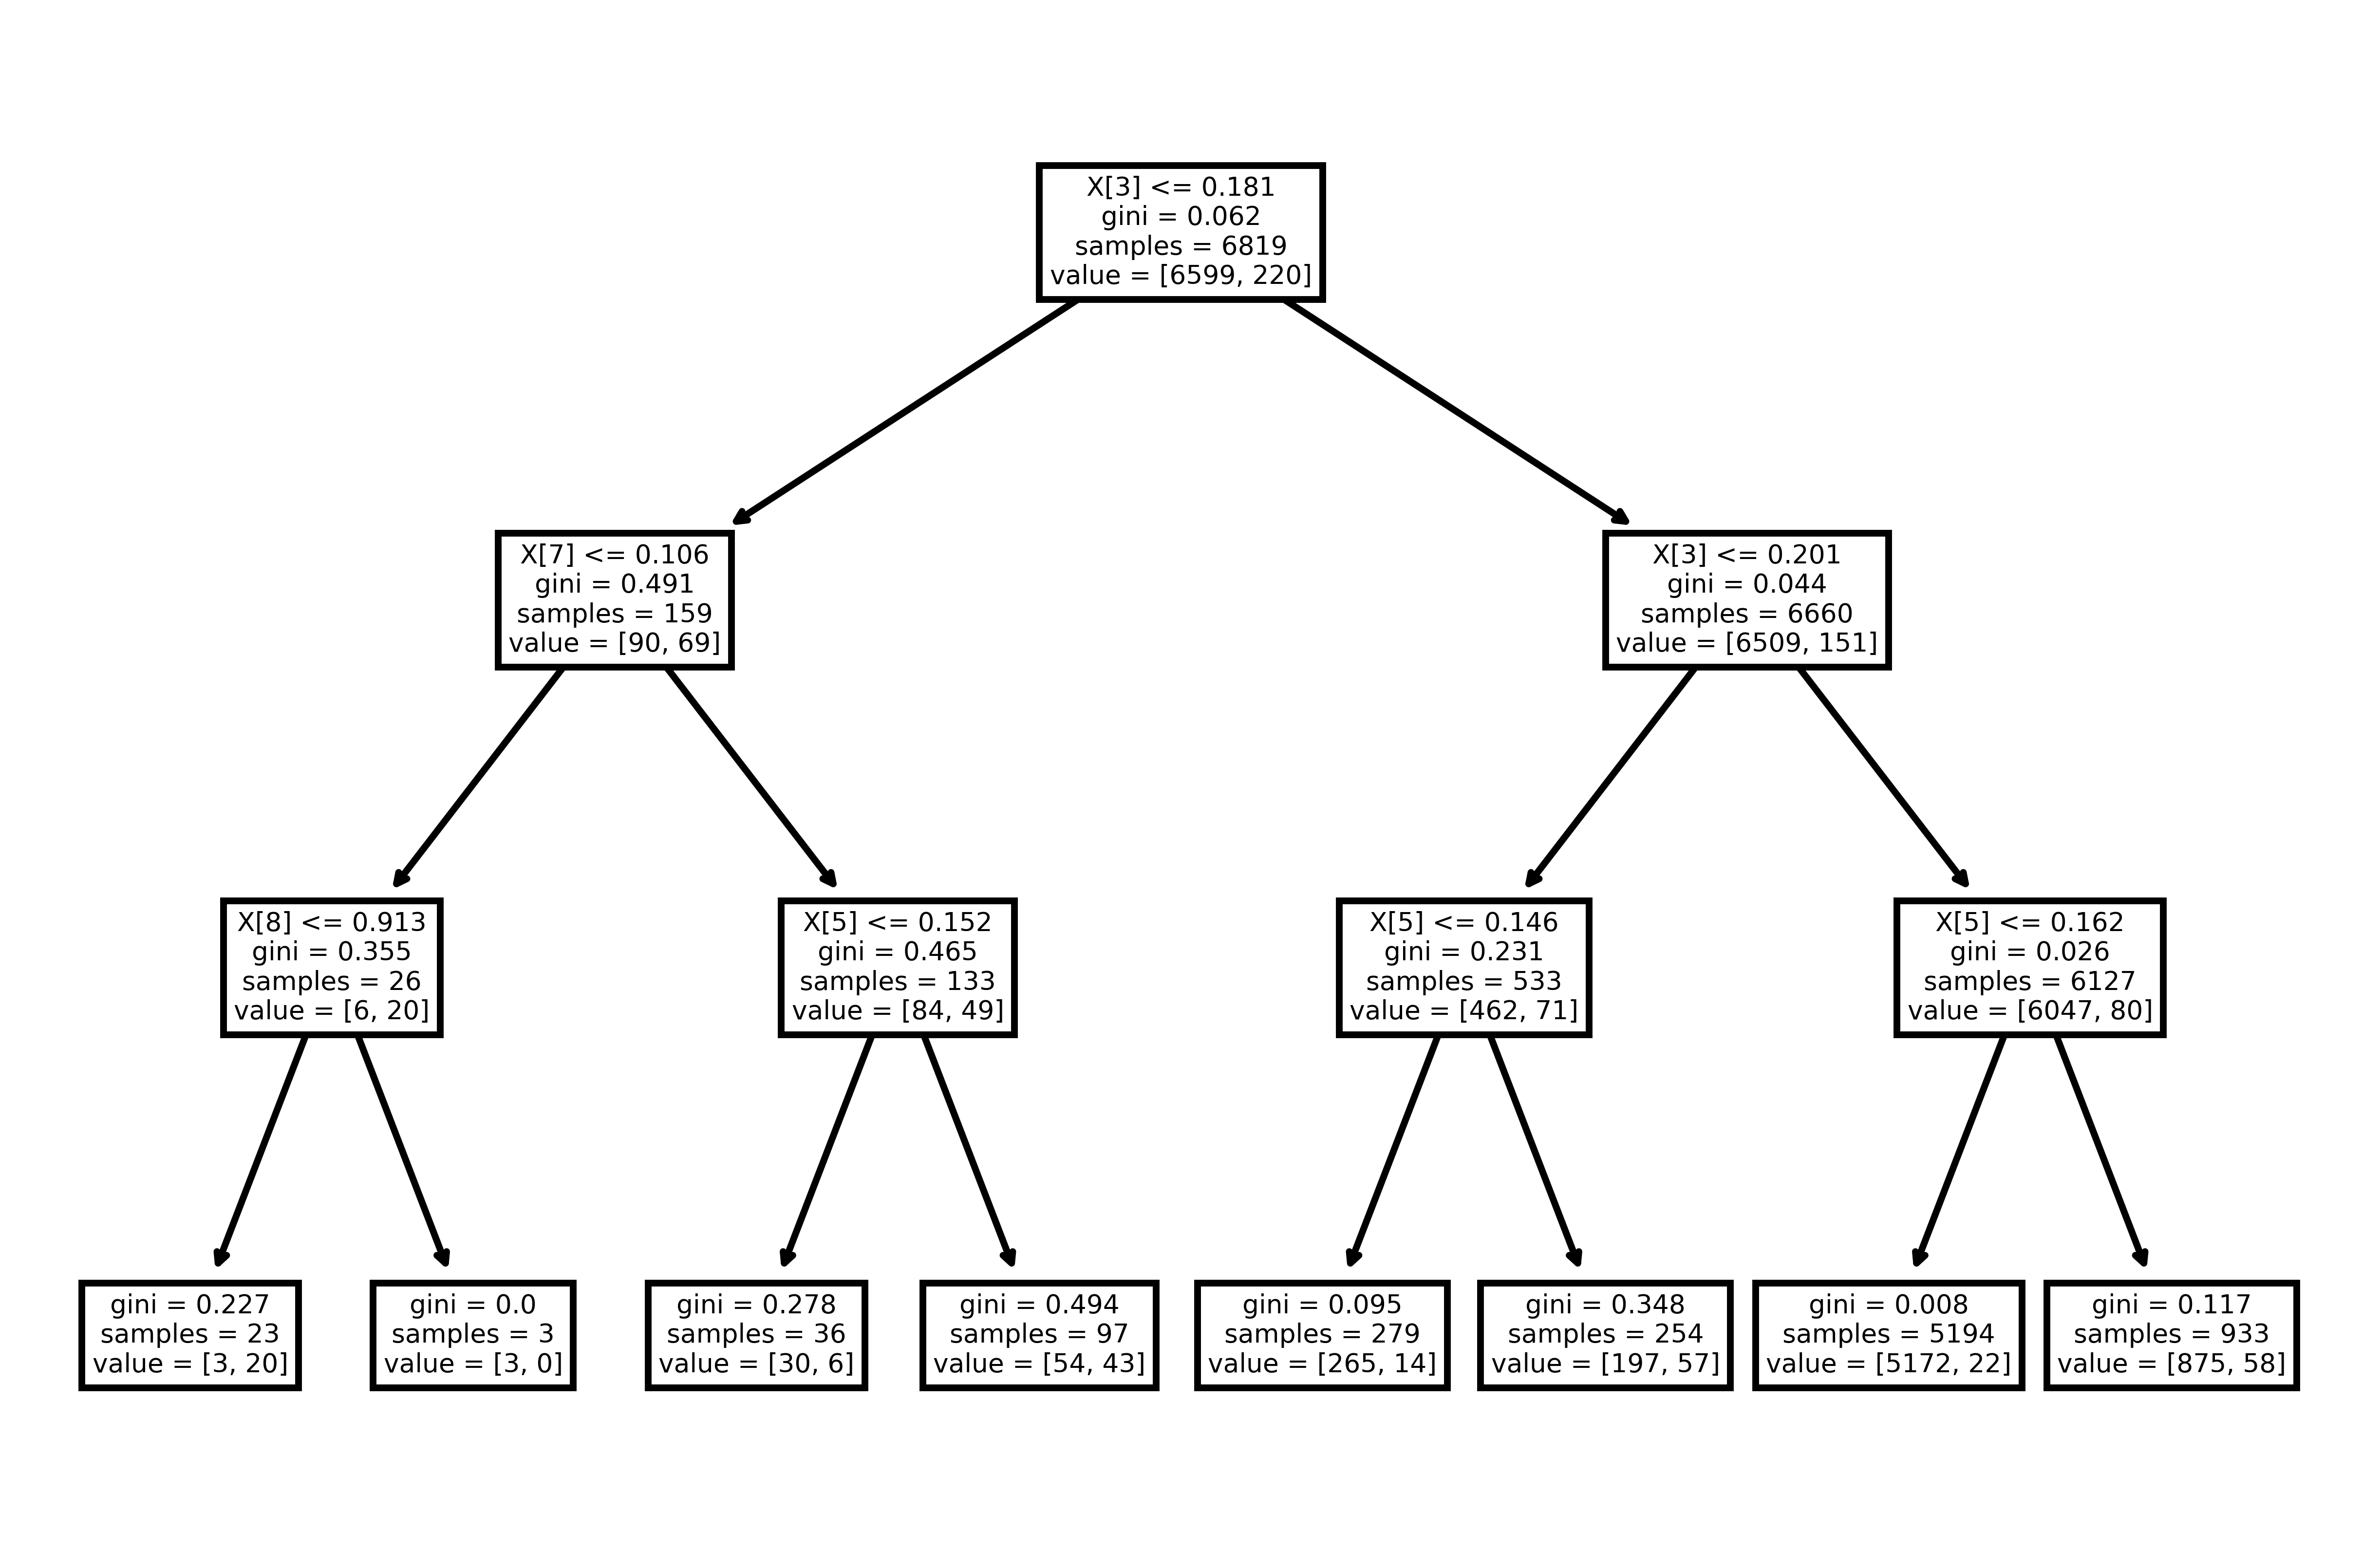

<Figure size 432x288 with 0 Axes>

In [10]:
gini_tree_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, random_state=seed)
k_results = cross_val_score(gini_tree_clf, X, y, cv=k)

t = traintime(gini_tree_clf, X, y, 100)
gini_tree_clf.fit(X, y)
plt.figure(dpi=1000)
plot_tree(gini_tree_clf)
plt.show()
plt.clf()

y_hat = gini_tree_clf.predict(X)
pre_rec_f1 = precision_recall_f1(y, y_hat)

results_df.loc[3] = ["Decision Tree - Gini", t, np.mean(k_results)] + pre_rec_f1

In [15]:
results_df

,Model Name,Train Time,Accuracy,F1-Score,Precision,Recall
1,Random Forest - Gini,0.665477,0.968764,0.186235,0.851852,0.104545
2,XGBoost - gbtree,0.520847,0.967885,0.863753,0.994083,0.763636
3,Decision Tree - Gini,0.017112,0.965391,0.164609,0.869565,0.090909


#### Conclusion
The metric I'll be comparing the models using is recall. Recall is a measure of the proportion of positive classifications that should be positive, and a higher recall is associated with a model that has fewer false negatives.

Recall is the best metric because our dataset is on company bankruptcy. Consider this scenario:
We have a company we are interested in investing in. Would you rather the model classify that company as at risk of bankruptcy and not going bankrupt and missing out on those profits, or the model classifies the company as not at risk of bankrupcy and going bankrupt? The obvious answer is the latter since, in the former, you can always invest in another company; however, in the latter, you have a net loss.

The model that performed the best on recall is XGBoost with gbtree booster.

Using accuracy as my metric would have given me a more accurate model; however, it would lose me a lot of money.